Импортируем необходимые модули

In [3]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Context

Загружаем датасет

In [4]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Смотрим описательную статистики по отдельным полям датасета

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [6]:
len(data[data.duplicated()])

0

In [7]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

Дубликаты строк отсутствуют

# Data quality assessment

Смотрим распределение значений в поле PassengerId

In [8]:
data['PassengerId'].value_counts()

0        1
66650    1
66672    1
66671    1
66670    1
        ..
33331    1
33330    1
33329    1
33328    1
99999    1
Name: PassengerId, Length: 100000, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


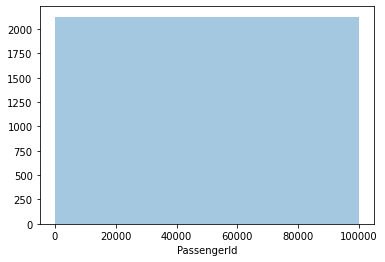

In [9]:
sns.distplot(data['PassengerId'], kde=False)

In [10]:
len(data[data['PassengerId'].isna()])

0

Значения PassengerId соответствуют идентификатору пассажира,  распределены равномерно, пропуски 
отсутствуют. Данные в этом поле можно считать качественными.

Смотрим распределение значений в поле Survived

In [11]:
data['Survived'].value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


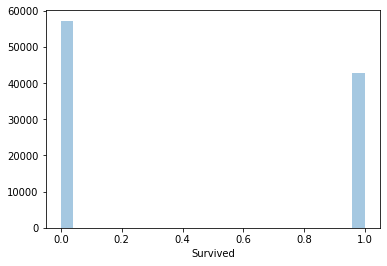

In [12]:
sns.distplot(data['Survived'], kde=False)

In [13]:
len(data[data['Survived'].isna()])

0

Значения Survived распределены по двум категориям 0 (не выжил) и 1 (выжил), пропуски отсутствуют. Данные в этом поле можно считать качественными.

Смотрим распределение значений в поле Pclass

In [14]:
data['Pclass'].value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


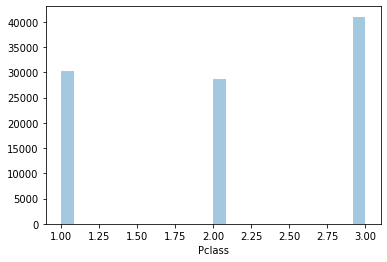

In [15]:
sns.distplot(data['Pclass'], kde=False)

In [16]:
len(data[data['Pclass'].isna()])

0

Значения Pclass распределены по трем категориям, обозначающим класс каюты пассажира (1,2,3), пропуски отсутствуют. Данные в этом поле можно считать качественными.

Смотрим распределение значений в поле Name

In [17]:
data['Name'].value_counts()

Johnson, John        31
Smith, James         24
Smith, John          24
Johnson, William     22
Smith, Michael       20
                     ..
Davis, Andre          1
Rosenblum, Ronald     1
Landry, Ernesto       1
Mcdonald, Frances     1
Enciso, Tyler         1
Name: Name, Length: 92144, dtype: int64

In [18]:
len(data[data['Name'].isna()])

0

Значения Name распределены практически равномерно с отдельными более частыми значениями и обозначают имя и фамилию пассажира, пропуски отсутствуют. Данные в этом поле можно считать качественными.


Смотрим распределение значений в поле Sex

In [19]:
data['Sex'].value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

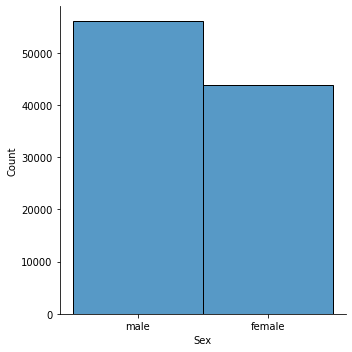

In [20]:
sns.displot(data, x='Sex')

In [21]:
len(data[data['Sex'].isna()])

0

Значения Sex распределены по двум категориям, обозначающим пол пассажира (Male, Female), пропуски отсутствуют. Данные в этом поле можно считать качественными после их замены на числовые признаки 0 для Female и 1 для Male. Выполним это преобразование.

In [22]:
data['Sex'] = np.where(data['Sex']=='female', 0, 1)

In [23]:
data['Sex'].value_counts()

1    56114
0    43886
Name: Sex, dtype: int64

Смотрим распределение значений в поле Age

In [24]:
data['Age'].value_counts()

25.0    2354
23.0    2345
26.0    2320
24.0    2298
27.0    2088
        ... 
14.5       1
74.5       1
78.5       1
13.5       1
87.0       1
Name: Age, Length: 173, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


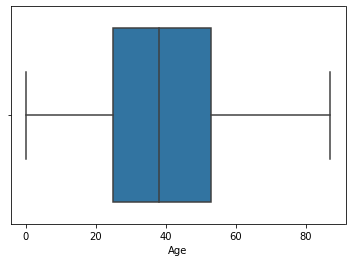

In [60]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


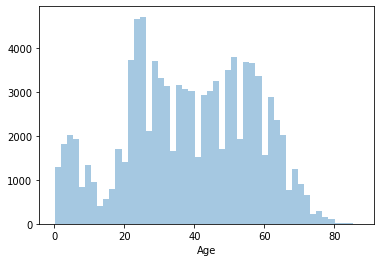

In [25]:
sns.distplot(data['Age'], kde=False)

In [26]:
len(data[data['Age'].isna()])

3292

Значения Age распределены бимодально и обозначают возраст пассажира. Имеется 3292 пропуска. Пропуски можно заполнить  значением моды. После этого данные в этом поле можно считать качественными. Выполним это преобразование.

In [27]:
age_mode = data['Age'].mode().values[0]
data.loc[data['Age'].isna(),'Age'] = age_mode

In [28]:
len(data[data['Age'].isna()])

0

Смотрим распределение значений в поле SibSp

In [29]:
data['SibSp'].value_counts()

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


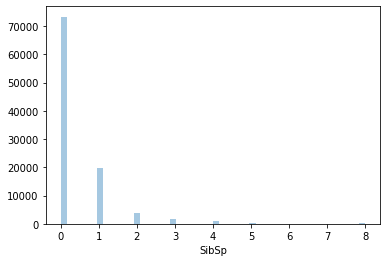

In [30]:
sns.distplot(data['SibSp'], kde=False)

In [31]:
len(data[data['SibSp'].isna()])

0

Значения SibSp экспоненциально распределены по семи категориям, обозначающим количество супргов или братьев/сестер пассажира (0,1,2,3,4,5,8), пропуски отсутствуют. Данные в этом поле можно считать качественными.

Смотрим распределение значений в поле Parch

In [32]:
data['Parch'].value_counts()

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


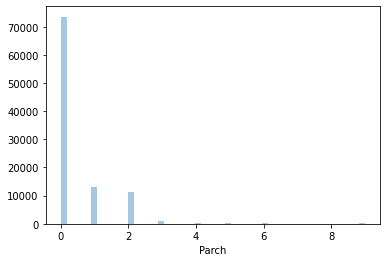

In [33]:
sns.distplot(data['Parch'], kde=False)

In [34]:
len(data[data['Parch'].isna()])

0

Значения Parch экспоненциально распределены по восьми категориям, обозначающим количество родителей или детей пассажира (0,1,2,3,4,5,6,9), пропуски отсутствуют. Данные в этом поле можно считать качественными.

Смотрим распределение значений в поле Ticket

In [35]:
data['Ticket'].value_counts()

A/5             602
C.A.            177
SC/PARIS        145
SOTON/O.Q.       80
SC               57
               ... 
421812            1
PC 420601         1
PC 26800          1
STON/O 23755      1
458074            1
Name: Ticket, Length: 75331, dtype: int64

In [36]:
len(data[data['Parch'].isna()])

0

Значения Ticket распределены по 75331 категориям, обозначающим номер билета, пропуски отсутствуют. Данные в этом поле можно считать качественными, но скорее всего бесполезными для дальнейшего анализа ввиду избыточного количества значений 

Смотрим распределение значений в поле Fare

In [37]:
data['Fare'].value_counts()

9.85      87
9.27      87
9.79      86
9.20      85
9.18      83
          ..
297.17     1
191.64     1
39.50      1
214.92     1
4.06       1
Name: Fare, Length: 15935, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


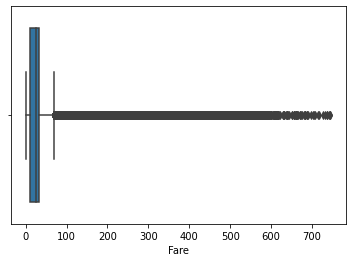

In [61]:
sns.boxplot(data['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


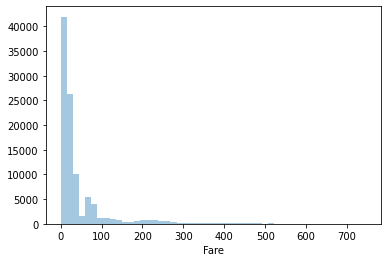

In [38]:
sns.distplot(data['Fare'], kde=False)

In [39]:
len(data[data['Fare'].isna()])

134

Значения Fare распределены экспоненциально и обозначают стоимость билета. Имеется 134 пропуска. Пропуски можно заполнить медианным значением. После этого данные в этом поле можно считать качественными. Выполним это преобразование

In [40]:
fare_median = data['Fare'].median()
data.loc[data['Fare'].isna(),'Fare'] = fare_median


In [41]:
len(data[data['Fare'].isna()])

0

Смотрим распределение значений в поле Cabin

In [42]:
data['Cabin'].value_counts()

C19828    6
C6906     5
C13699    5
C14534    5
B11110    5
         ..
A21234    1
A4905     1
C7208     1
A5788     1
D17243    1
Name: Cabin, Length: 26992, dtype: int64

In [43]:
len(data[data['Cabin'].isna()])

67866

Значения Cabin распределены по 26992 категориям, обозначающим номер 
каюты. Имеется 67866 пропусков. Данные в этом поле можно считать бесполезными для дальнейшего анализа ввиду избыточного количества значений и пропусков.

Смотрим распределение значений в поле Embarked

In [44]:
data['Embarked'].value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

In [45]:
len(data[data['Embarked'].isna()])

250

Значения Embarked распределены по 3 категориям, обозначающим порт посадки пассажира (S,C,Q). Имеется 250 пропусков. Пропуски можно заполнить модальным значением (S). Также заменим буквенные обозначения категорий на числовые: S на 1, C на 2, Q на 3. После этого данные в этом поле можно считать качественными. Выполним это преобразование.

In [46]:
emb_mode = data['Embarked'].mode().values[0]
data.loc[data['Embarked'].isna(),'Embarked'] = emb_mode
data.loc[data['Embarked'] == 'S','Embarked'] = 1
data.loc[data['Embarked'] == 'C','Embarked'] = 2
data.loc[data['Embarked'] == 'Q','Embarked'] = 3

In [47]:
data['Embarked'].value_counts()

1    72389
2    22187
3     5424
Name: Embarked, dtype: int64

In [48]:
len(data[data['Embarked'].isna()])

0

# Data exploration

Исследуем корреляцию между признаками

In [50]:
corr_data = data[['Survived','Pclass','Sex','Age','SibSp','Parch', 'Fare','Embarked']]


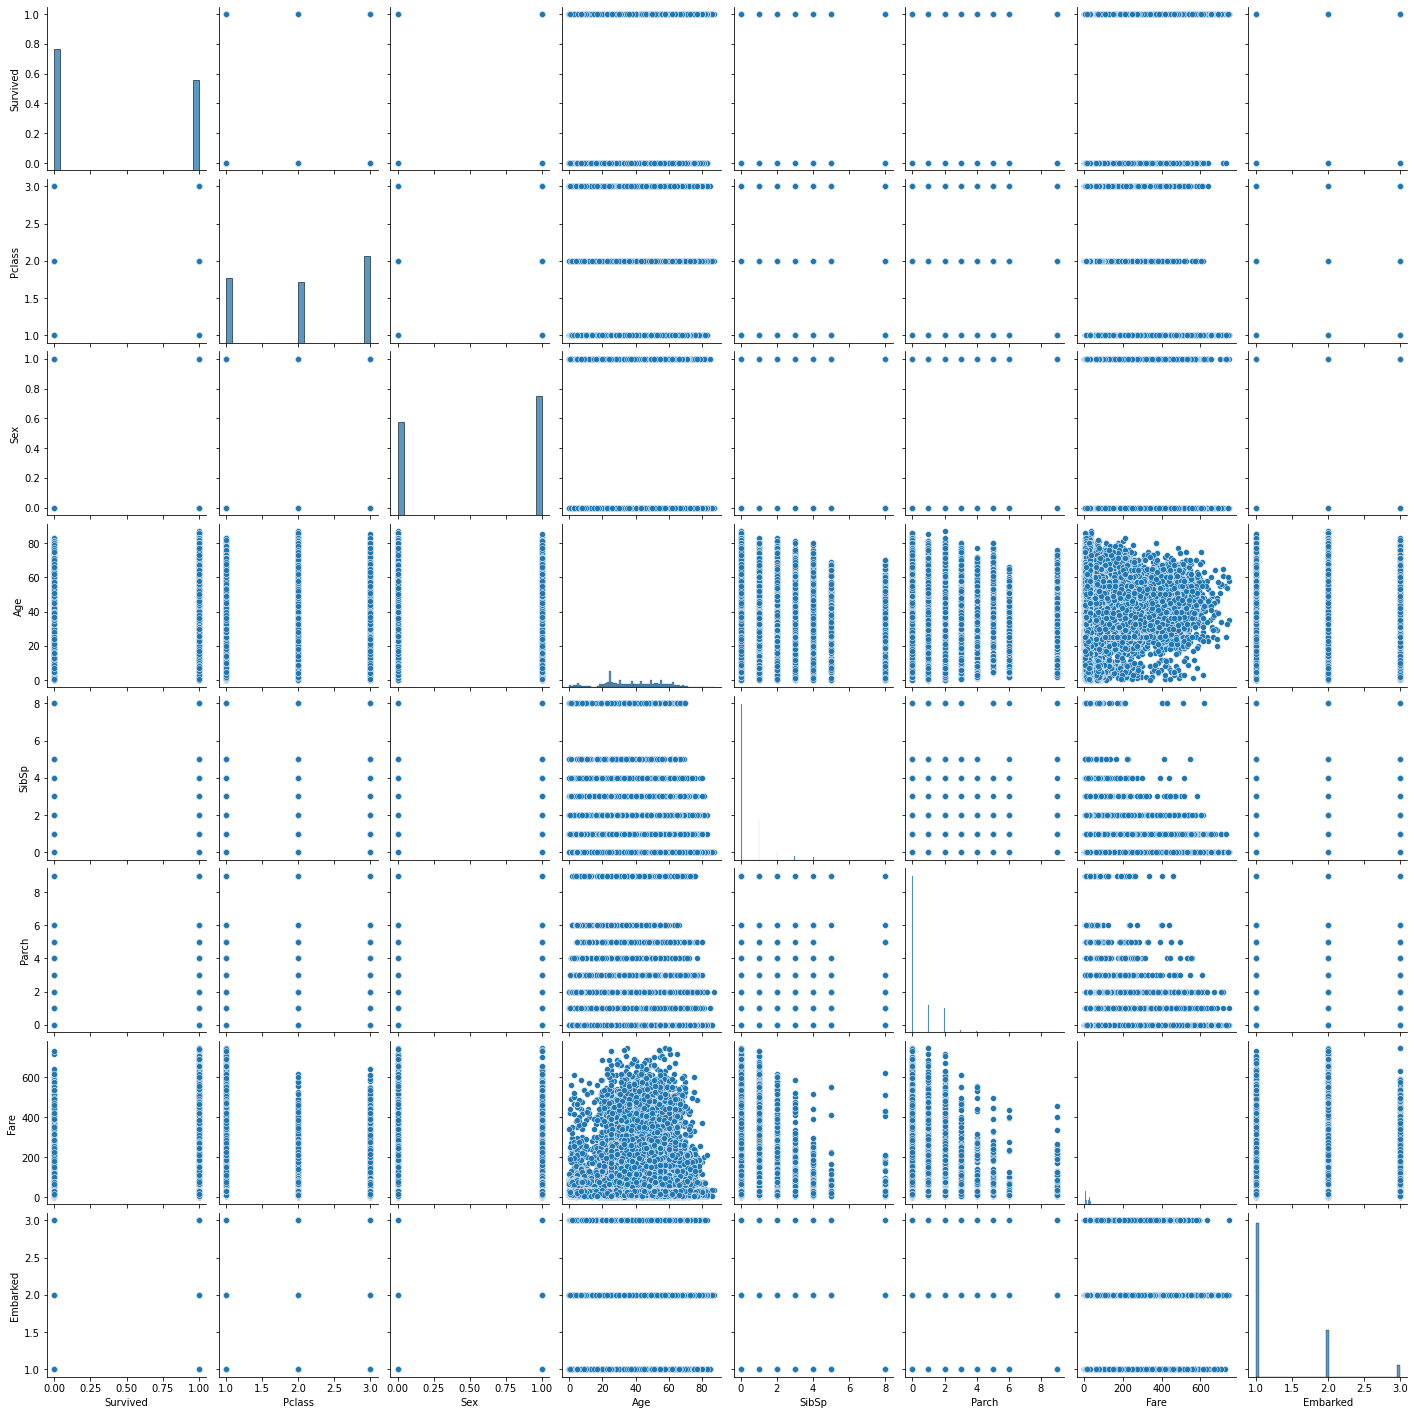

In [51]:
sns.pairplot(data=corr_data)

In [52]:
corr_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.289723,-0.507260,0.102078,-0.007587,0.023352,0.187376
Pclass,-0.289723,1.000000,0.198617,-0.253238,-0.051436,-0.041848,-0.417054
Sex,-0.507260,0.198617,1.000000,-0.080531,-0.030627,-0.087666,-0.143449
Age,0.102078,-0.253238,-0.080531,1.000000,-0.109345,-0.122057,0.106387
SibSp,-0.007587,-0.051436,-0.030627,-0.109345,1.000000,0.213126,0.059369
Parch,0.023352,-0.041848,-0.087666,-0.122057,0.213126,1.000000,0.061401
Fare,0.187376,-0.417054,-0.143449,0.106387,0.059369,0.061401,1.000000


Видно, что корреляция между признаков практически отсутствует 

# Summary

Данные проверены на наличие пропусков, дубликатов и выбросов. Пропуски заменены значениями моды или медианы. Сильной корреляции между признаками не выявлено. Данные готовы для построения моделей.